In [97]:
# import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [98]:
# read dataset
df = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv',na_values='NA')
df.head(5)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


### **Part 1: Build the Model**

In [ ]:
y = df.cvd_4types	
X = df.drop('cvd_4types', axis= 1) # drop record
logit_model = sm.Logit(y,X) # create logit model
result=logit_model.fit()
print(result.summary2()) # results summary

In [ ]:
# identify columns needed, remove non-significant variables
col = ['age_s1','race','educat','mstat','hip','waist','av_weight_kg','parrptdiab','bend25','tired25','hlthlm25']
X = X[col]
logit_model = sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [101]:
# split X and y into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_pred_prob= clf.predict_proba(X_test)[:, 1]

In [102]:
# calculate AUC
print('AUC:',metrics.roc_auc_score(y_test, y_pred_prob))

AUC: 0.6614808577952975


In [103]:
# calculate accuracy
print('Accuracy score:',clf.score(X_test, y_test))

Accuracy score: 0.6091245376078915


### **Part 2: Display Feature Importance**

In [ ]:
clf.fit(X/ np.std(X, 0),y)
coef_table = pd.DataFrame(abs(clf.coef_), columns= col).transpose().sort_values(by=0,ascending=False)
coef_table.rename(columns={0: "coefficient"},inplace=True)
coef_table # display coefficient table

### **Part 3: ROC Curve**

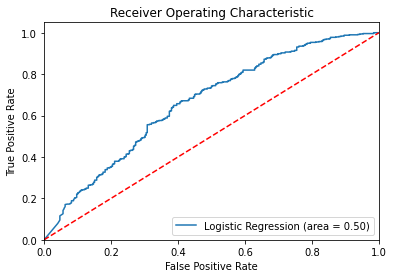

In [107]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()